In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()

In [89]:
df = pd.read_csv("LBJPO.csv")
df.head()

,Rk,G,Date,Series,Tm,Opp,G#,Outcome,GS,MP,...,TOV%,USG%,ORtg,DRtg,GmSc.1,Home/Away,Away,Home,Win/Loss,Point Diff
0,1.0,1.0,2006-04-22,EC1,CLE,WAS,1.0,W (+11),1.0,48:00,...,11.2,33.6,115.0,105.0,23.3,H,0.0,1.0,W,11.0
1,2.0,2.0,2006-04-25,EC1,CLE,WAS,2.0,L (-5),1.0,43:28,...,24.0,41.1,72.0,95.0,6.7,H,0.0,1.0,L,-5.0
2,3.0,3.0,2006-04-28,EC1,CLE,WAS,3.0,W (+1),1.0,47:37,...,11.1,33.3,119.0,104.0,27.4,@,1.0,0.0,W,1.0
3,4.0,4.0,2006-04-30,EC1,CLE,WAS,4.0,L (-10),1.0,45:20,...,21.2,34.7,121.0,122.0,23.0,@,1.0,0.0,L,-10.0
4,5.0,5.0,2006-05-03,EC1,CLE,WAS,5.0,W (+1),1.0,46:07,...,11.5,35.9,148.0,126.0,38.4,H,0.0,1.0,W,1.0


In [90]:
#LeBron's playoff games can be split into 4 stints: 1st CLE stint, MIA, 2nd CLE stint and LAL
df["Stint"] = "CLE(06-10)"
for i in range(0,len(df)):
    if df["Tm"].iloc[i] == "MIA":
        df["Stint"].iloc[i] = "MIA"
    elif "2015" in df["Date"].iloc[i] or "2016" in df["Date"].iloc[i] or "2017" in df["Date"].iloc[i] or "2018" in df["Date"].iloc[i]:
        df["Stint"].iloc[i] = "CLE(15-18)"
    elif df["Tm"].iloc[i] == "LAL":
        df["Stint"].iloc[i] = "LAL"

c:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Overall Win Percentage: 0.65%
1st Cleveland Stint Win Percentage: 0.59%
Miami Win Percentage: 0.68%
2nd Cleveland Stint Win Percentage: 0.68%
Lakers Win Percentage: 0.67%


c:\Users\waiho\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


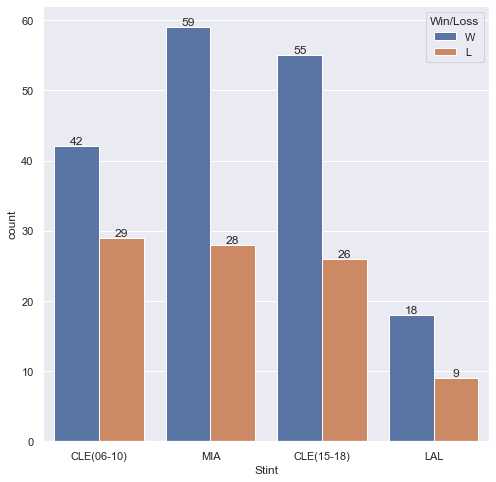

In [91]:
#Win-Loss Record (Split into: 1st CLE stint, MIA, 2nd CLE stint and LAL)
winpct = df["Win/Loss"].value_counts()["W"] / df.shape[0]
winpct_cle1 = len(df.loc[(df["Win/Loss"] == "W") & (df["Stint"] == "CLE(06-10)")]) / len(df.loc[df["Stint"] == "CLE(06-10)"])
winpct_mia = len(df.loc[(df["Win/Loss"] == "W") & (df["Stint"] == "MIA")]) / len(df.loc[df["Stint"] == "MIA"])
winpct_cle2 = len(df.loc[(df["Win/Loss"] == "W") & (df["Stint"] == "CLE(15-18)")]) / len(df.loc[df["Stint"] == "CLE(15-18)"])
winpct_lal = len(df.loc[(df["Win/Loss"] == "W") & (df["Stint"] == "LAL")]) / len(df.loc[df["Stint"] == "LAL"])
print("Overall Win Percentage: {:.2f}%".format(winpct))
print("1st Cleveland Stint Win Percentage: {:.2f}%".format(winpct_cle1))
print("Miami Win Percentage: {:.2f}%".format(winpct_mia))
print("2nd Cleveland Stint Win Percentage: {:.2f}%".format(winpct_cle2))
print("Lakers Win Percentage: {:.2f}%".format(winpct_lal))

plt.figure(figsize=(8,8))
ax = sb.countplot("Stint", data=df, hue="Win/Loss")
for container in ax.containers:
    ax.bar_label(container)

Overall
count    266.000000
mean       3.894737
std       14.157211
min      -36.000000
25%       -5.000000
50%        5.000000
75%       12.000000
max       44.000000
Name: Point Diff, dtype: float64
CLE(06-10)
count    71.000000
mean      2.295775
std      13.248606
min     -36.000000
25%      -5.000000
50%       2.000000
75%      10.500000
max      30.000000
Name: Point Diff, dtype: float64
MIA
count    87.000000
mean      4.620690
std      13.175242
min     -36.000000
25%      -3.500000
50%       6.000000
75%      12.000000
max      37.000000
Name: Point Diff, dtype: float64
CLE(15-18)
count    81.000000
mean      4.518519
std      16.332568
min     -34.000000
25%      -7.000000
50%       5.000000
75%      13.000000
max      44.000000
Name: Point Diff, dtype: float64
LAL
count    27.000000
mean      3.888889
std      12.858201
min     -30.000000
25%      -7.500000
50%       8.000000
75%      11.000000
max      23.000000
Name: Point Diff, dtype: float64


Text(0.5, 0, 'LAL')

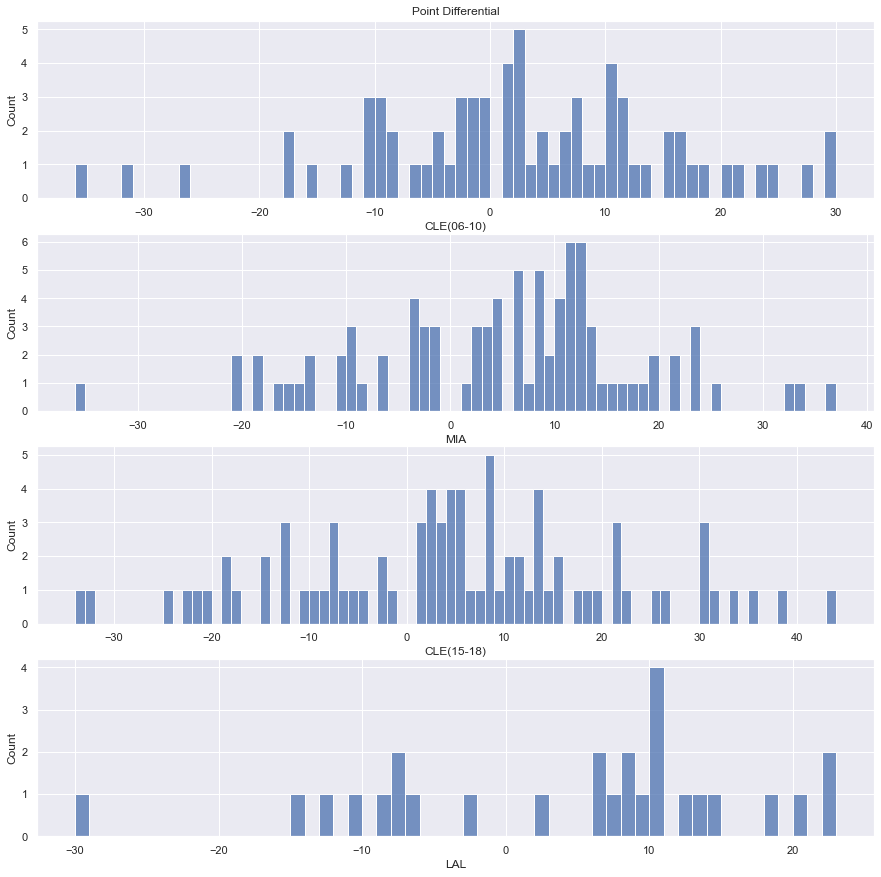

<Figure size 1440x864 with 0 Axes>

In [92]:
#Point Differential
print("Overall")
print(df["Point Diff"].describe())
print("CLE(06-10)")
print(df.loc[df["Stint"] == "CLE(06-10)"]["Point Diff"].describe())
print("MIA")
print(df.loc[df["Stint"] == "MIA"]["Point Diff"].describe())
print("CLE(15-18)")
print(df.loc[df["Stint"] == "CLE(15-18)"]["Point Diff"].describe())
print("LAL")
print(df.loc[df["Stint"] == "LAL"]["Point Diff"].describe())

fig,ax = plt.subplots(4,1, figsize=(15,15))
plt.figure(figsize=(20, 12))
ax[0].set_title("Point Differential")
sb.histplot(x = "Point Diff", data=df.loc[df["Stint"] == "CLE(06-10)"], binwidth=1, ax=ax[0])
ax[0].set_xlabel("CLE(06-10)")
sb.histplot(x = "Point Diff", data=df.loc[df["Stint"] == "MIA"], binwidth=1, ax=ax[1])
ax[1].set_xlabel("MIA")
sb.histplot(x = "Point Diff", data=df.loc[df["Stint"] == "CLE(15-18)"], binwidth=1, ax=ax[2])
ax[2].set_xlabel("CLE(15-18)")
sb.histplot(x = "Point Diff", data=df.loc[df["Stint"] == "LAL"], binwidth=1, ax=ax[3])
ax[3].set_xlabel("LAL")

<AxesSubplot:xlabel='Point Diff', ylabel='Stint'>

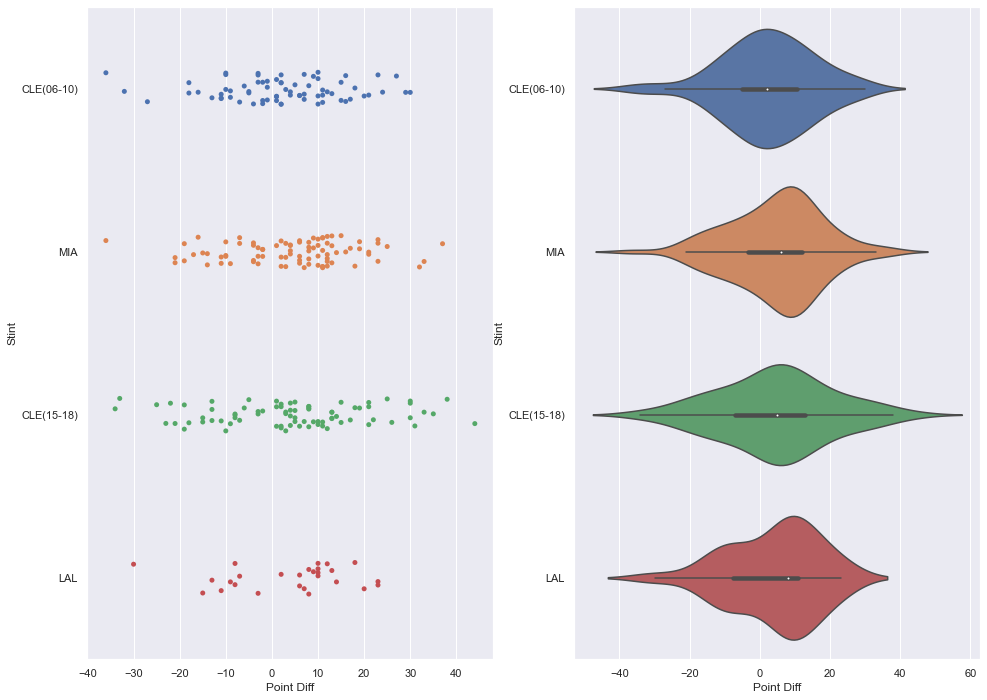

In [104]:
fig,ax = plt.subplots(1, 2, figsize=(16,12))
sb.stripplot(x="Point Diff",y="Stint", data=df, ax=ax[0])
sb.violinplot(x="Point Diff", y="Stint", data=df, ax=ax[1])

Overall
count    266.000000
mean      28.687970
std        8.113604
min        7.000000
25%       23.000000
50%       28.000000
75%       33.750000
max       51.000000
Name: PTS, dtype: float64
CLE(06-10)
count    71.000000
mean     29.309859
std       8.764525
min      10.000000
25%      22.500000
50%      29.000000
75%      35.000000
max      49.000000
Name: PTS, dtype: float64
MIA
count    87.000000
mean     26.873563
std       7.050985
min       7.000000
25%      22.000000
50%      28.000000
75%      31.500000
max      49.000000
Name: PTS, dtype: float64
CLE(15-18)
count    81.000000
mean     30.765432
std       8.372980
min      11.000000
25%      24.000000
50%      30.000000
75%      38.000000
max      51.000000
Name: PTS, dtype: float64
LAL
count    27.000000
mean     26.666667
std       7.364154
min      10.000000
25%      23.000000
50%      26.000000
75%      30.000000
max      40.000000
Name: PTS, dtype: float64


<AxesSubplot:xlabel='PTS', ylabel='Stint'>

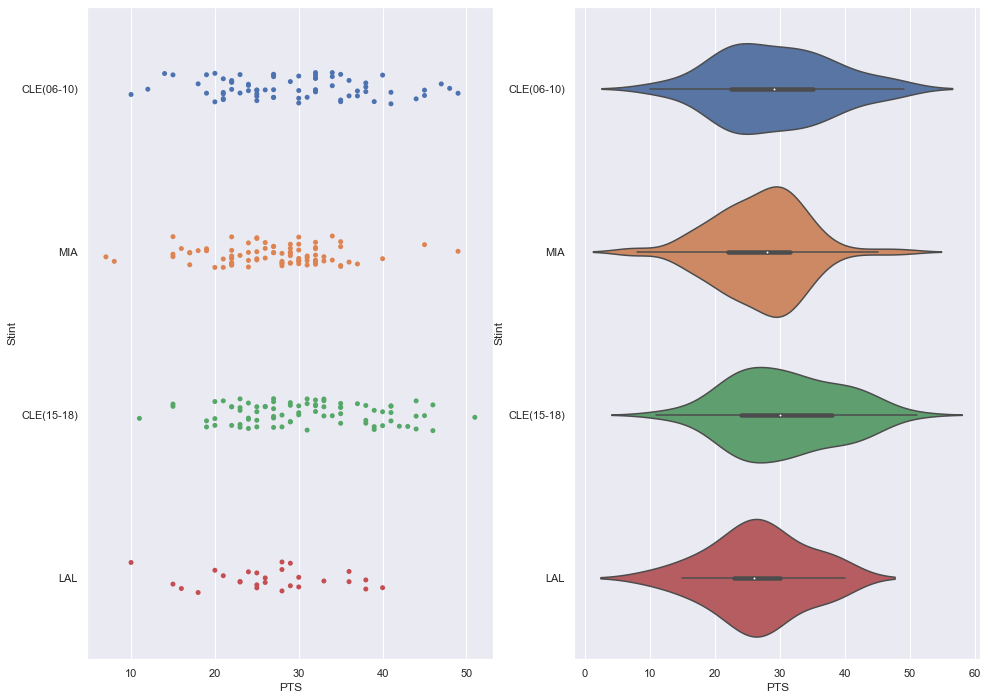

In [107]:
#Points
print("Overall")
print(df["PTS"].describe())
print("CLE(06-10)")
print(df.loc[df["Stint"] == "CLE(06-10)"]["PTS"].describe())
print("MIA")
print(df.loc[df["Stint"] == "MIA"]["PTS"].describe())
print("CLE(15-18)")
print(df.loc[df["Stint"] == "CLE(15-18)"]["PTS"].describe())
print("LAL")
print(df.loc[df["Stint"] == "LAL"]["PTS"].describe())

fig,ax = plt.subplots(1, 2, figsize=(16,12))
sb.stripplot(x="PTS",y="Stint", data=df, ax=ax[0])
sb.violinplot(x="PTS", y="Stint", data=df, ax=ax[1])

Wins
count    174.000000
mean      29.913793
std        7.391491
min       10.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       49.000000
Name: PTS, dtype: float64
Losses
count    92.000000
mean     26.369565
std       8.918086
min       7.000000
25%      21.000000
50%      25.000000
75%      30.000000
max      51.000000
Name: PTS, dtype: float64


<AxesSubplot:xlabel='PTS', ylabel='Win/Loss'>

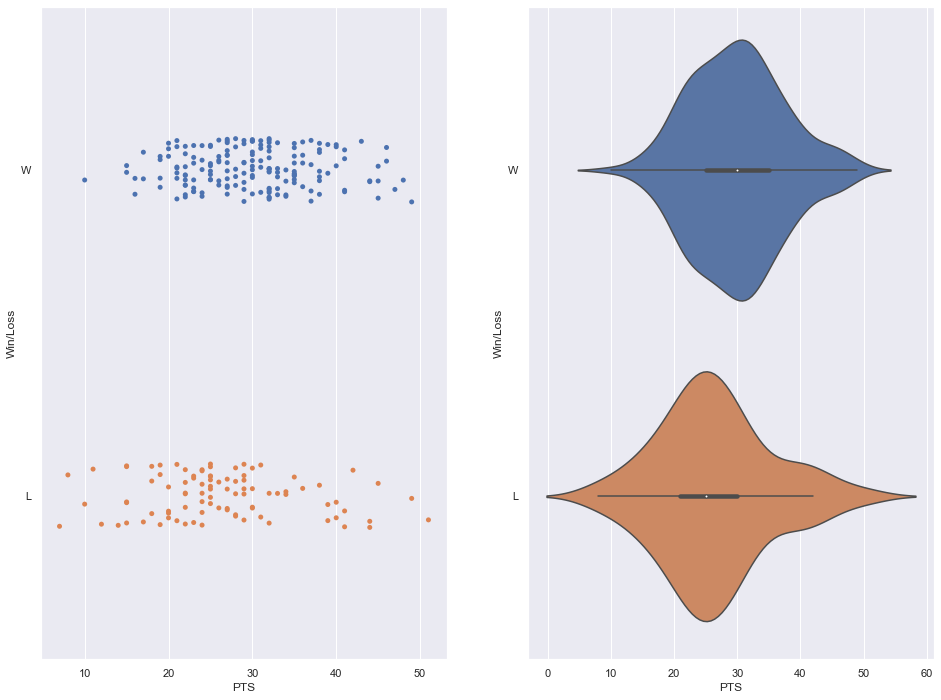

In [108]:
print("Wins")
print(df.loc[df["Win/Loss"] == "W"]["PTS"].describe())
print("Losses")
print(df.loc[df["Win/Loss"] == "L"]["PTS"].describe())

fig,ax = plt.subplots(1, 2, figsize=(16,12))
sb.stripplot(x="PTS",y="Win/Loss", data=df, ax=ax[0])
sb.violinplot(x="PTS", y="Win/Loss", data=df, ax=ax[1])